In [1]:
import matplotlib.cm as cm

In [ ]:
from PIL import Image
import os

# Define the input and output directories
input_dir = '/content/drive/MyDrive/fastai/landscapes/toCrop/'
output_dir = '/content/drive/MyDrive/fastai/landscapes/Cropped/'

# Define the tile size (80x80)
tile_size = 80

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# List all files in the input directory
input_files = os.listdir(input_dir)

# Process each image file
for file_name in input_files:
    # Construct the full path to the input image
    input_path = os.path.join(input_dir, file_name)

    # Open the image using Pillow
    img = Image.open(input_path)

    # Calculate the new width and height to make them multiples of tile_size
    width, height = img.size
    new_width = (width // tile_size) * tile_size
    new_height = (height // tile_size) * tile_size

    # Resize the image to the nearest multiples of tile_size
    img = img.resize((new_width, new_height))

    # Split the resized image into tiles
    for x in range(0, new_width, tile_size):
        for y in range(0, new_height, tile_size):
            # print('a file done')
            # Crop a tile from the image
            tile = img.crop((x, y, x + tile_size, y + tile_size))

            # Define the output tile file path
            tile_name = f"{file_name.split('.')[0]}_{x}_{y}.jpg"  # Customize the naming as needed
            tile_path = os.path.join(output_dir, tile_name)

            # Save the tile
            tile.save(tile_path)

print("Image cropping and saving complete.")

In [3]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.4 MB/s eta 0:00:00
Mounted at /content/gdrive


In [4]:
#hide
from fastbook import *

In [5]:
from fastai.vision.all import *

In [6]:
data_path = Path('/content/gdrive/MyDrive/fastai/landscapes/Cropped/')

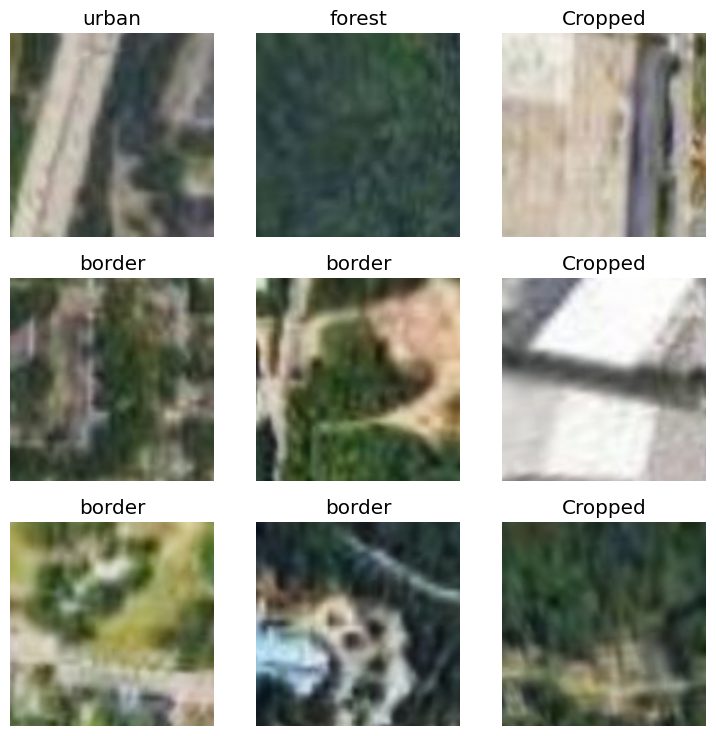

In [7]:

# Define data augmentation and transformation (optional, but recommended)
data_augmentation = aug_transforms(mult=1.0, do_flip=True, flip_vert=False, max_rotate=10.0, min_zoom=1.0,
                                   max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75)

# Create an ImageDataLoaders object with automatic train/valid split
dls = ImageDataLoaders.from_folder(data_path, valid_pct=0.2,
                                  item_tfms=Resize(460), batch_tfms=[*data_augmentation, Normalize.from_stats(*imagenet_stats)])

# Show a batch of data
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
# learn.lr_find()
learn.fine_tune(epochs=5, base_lr=0.004)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

epoch,train_loss,valid_loss,accuracy,time
0,1.778069,3.159300,0.375000,00:43


epoch,train_loss,valid_loss,accuracy,time
0,1.002041,1.853455,0.570312,00:14
1,0.889893,0.865854,0.695312,00:13
2,0.763497,0.544149,0.828125,00:13
3,0.659603,0.565184,0.835938,00:13
4,0.564658,0.514562,0.859375,00:14


In [ ]:
learn.fine_tune(epochs=5, base_lr=0.004)

epoch,train_loss,valid_loss,accuracy,time
0,0.344920,0.489025,0.882812,00:11


epoch,train_loss,valid_loss,accuracy,time
0,0.313557,0.427251,0.875000,00:14
1,0.287721,0.459244,0.890625,00:14
2,0.278373,0.551609,0.843750,00:14
3,0.287670,0.560561,0.851562,00:14
4,0.274638,0.500995,0.843750,00:14


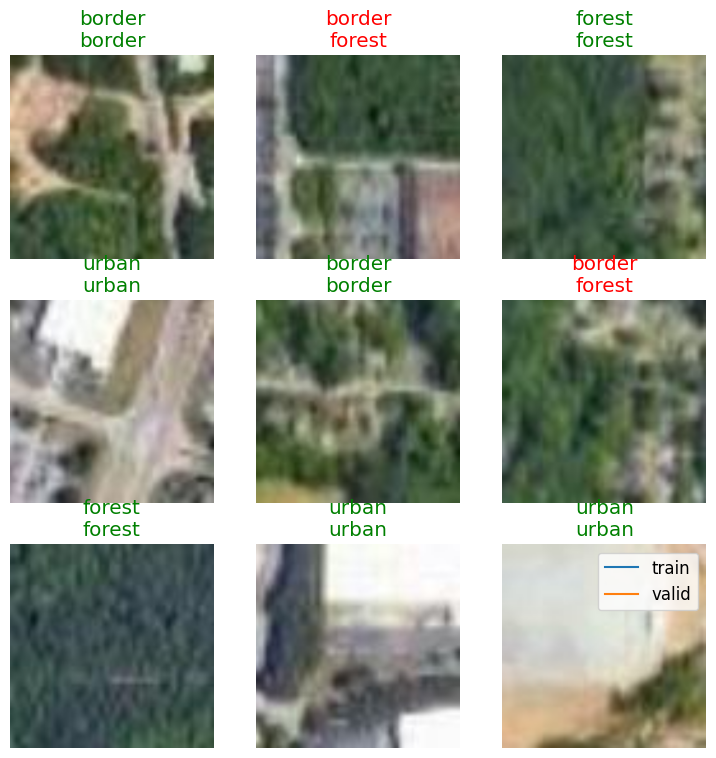

In [ ]:
learn.show_results()
learn.recorder.plot_loss()

In [ ]:
learn.export('/content/gdrive/MyDrive/fastai/landscapes/tiled_resnet34')

In [8]:
learn = load_learner('/content/gdrive/MyDrive/fastai/landscapes/tiled_resnet34')

In [10]:
img = PILImage.create('/content/gdrive/MyDrive/fastai/landscapes/Cropped/urban/4_80_400.jpg')
learn.predict(img)

('urban', tensor(2), tensor([1.0336e-04, 9.7158e-05, 9.9933e-01, 4.6899e-04]))

In [ ]:
img = PILImage.create('/content/test.jpg')
img = img.resize((80, 80))
load.predict(img)

('urban', tensor(2), tensor([5.3577e-06, 2.4250e-06, 9.9994e-01, 5.7237e-05]))

In [16]:
img = PILImage.create('/content/test_grid3.jpg')

tile_size = 80
fp = 5 #fts/pix

# Get the image dimensions
width, height = img.size

img = img.resize((math.ceil(width*fp/5),math.ceil(height*fp/5)))

# Calculate the new width and height to make them multiples of 80
new_width = math.ceil(width / tile_size) * tile_size
new_height = math.ceil(height / tile_size) * tile_size

# Resize the image to the nearest multiple of 80
img_resized = img.resize((new_width, new_height))

# Create an empty grid to store predictions
predictions_grid = np.empty((new_height, new_width), dtype=object)

# Divide the resized image into tiles of 80x80
for x in range(0, new_width, tile_size):
    for y in range(0, new_height, tile_size):
        # Crop a tile from the resized image
        tile = img_resized.crop((x, y, x + tile_size, y + tile_size))

        # Pass the tile through the model for prediction
        prediction = learn.predict(tile)
        # print(x,y,prediction[1].item())

        # Store the prediction in the corresponding grid position
        predictions_grid[y:y+tile_size, x:x+tile_size] = prediction[1].item()

colormap = {
    0: (140, 170, 90),  # unsure
    1: (0, 255, 0),  # Green
    2: (190, 150, 128),  # Urban
    3: (0, 0, 255) # Blue
    # Add more mappings for other integers as needed
}

# Create an RGB image using vectorized code
rgb_image = np.zeros((predictions_grid.shape[0], predictions_grid.shape[1], 3), dtype=np.uint8)

# Map integer values to RGB colors
for key, value in colormap.items():
    mask = predictions_grid == key
    rgb_image[mask] = value

# Convert the NumPy array to a PIL Image
rgb_image = Image.fromarray(rgb_image)

rgb_image = rgb_image.convert("RGBA")
img_resized = img_resized.convert("RGBA")


In [17]:
blend = Image.blend(img_resized, rgb_image, alpha=0.5)
output = Image.new('RGB', (blend.width, rgb_image.height + blend.height + img_resized.height))
output.paste(img_resized, (0, 0))
output.paste(blend, (0, rgb_image.height))
output.paste(rgb_image, (0, rgb_image.height+blend.height))
output.save('/content/output3.png')